In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #plots appear directly in the notebook

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
data.shape

(400, 3)

In [5]:
X = data.drop(columns='Purchased')
y = data['Purchased']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_transform = ss.fit_transform(X_train)
X_test_transform = ss.transform(X_test)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_transform,y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
y_pred_test = tree.predict(X_test_transform)

In [8]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test,y_pred_test)

0.9

In [9]:
f1_score(y_test,y_pred_test)

0.8260869565217391

In [10]:
from sklearn.tree import plot_tree

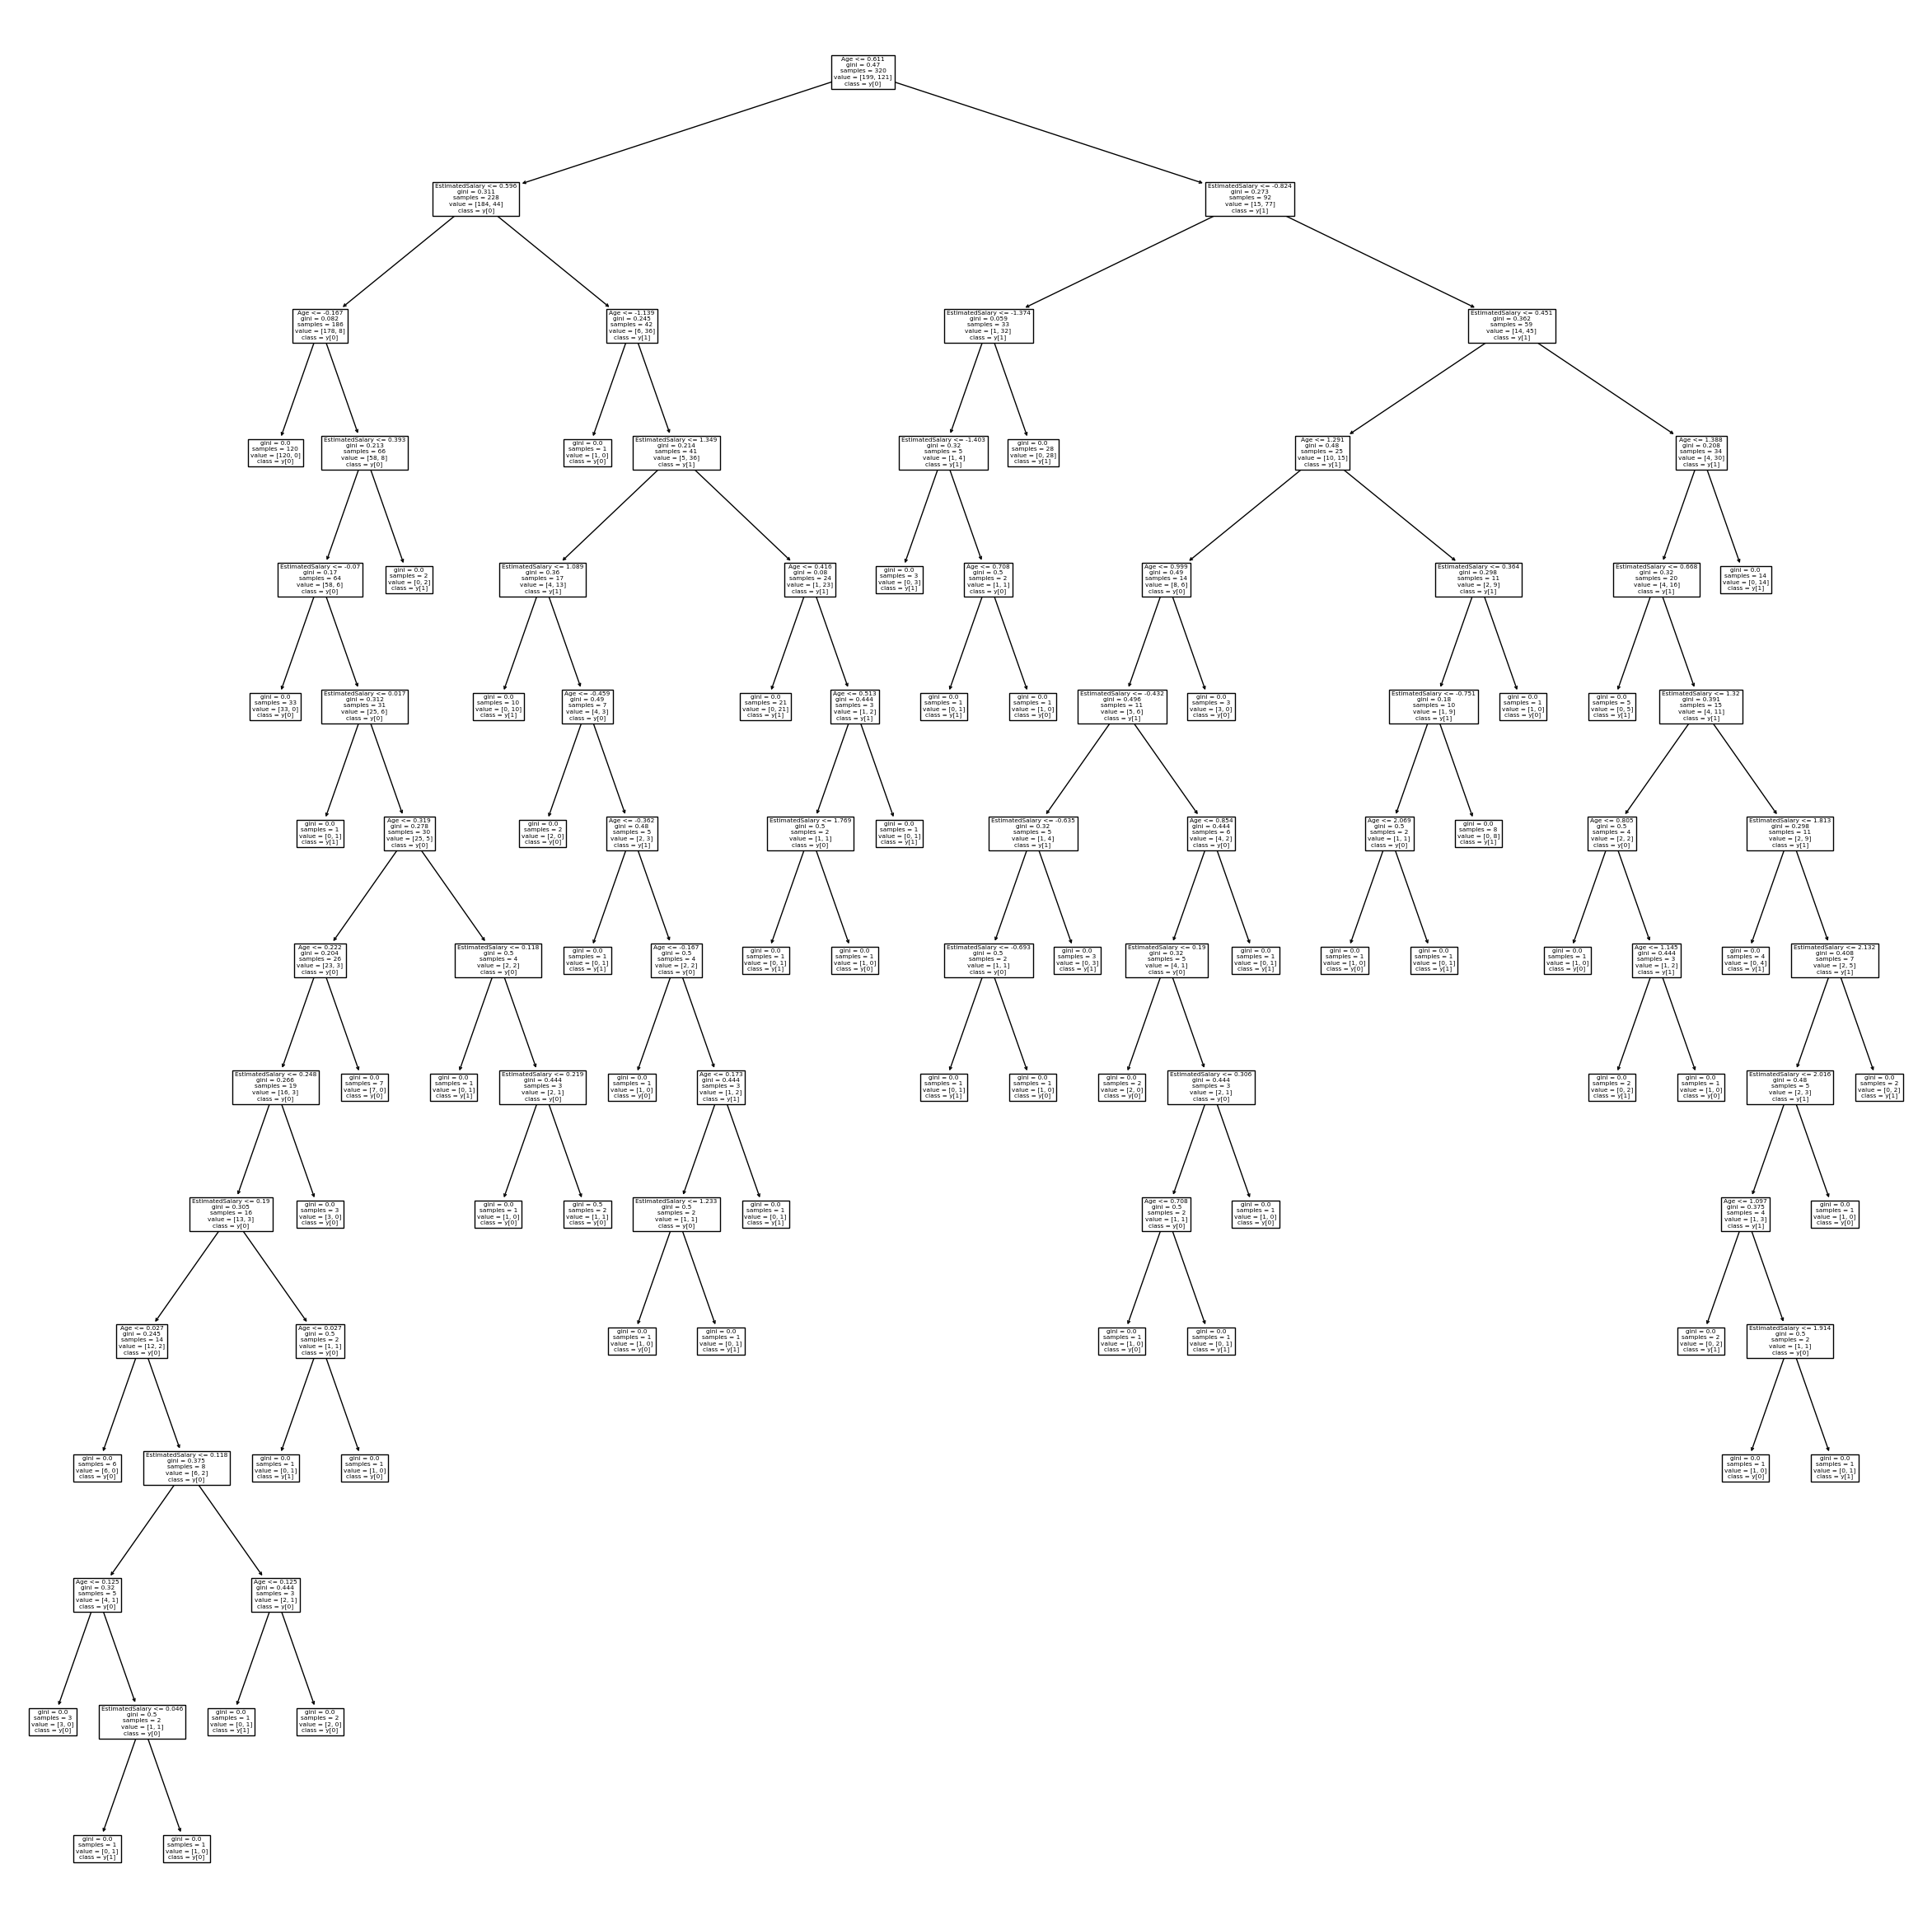

In [11]:
plt.figure(figsize=(30,30))
plot_tree(tree,feature_names=X.columns,class_names=True)
plt.show()

In [12]:
y_pred_train = tree.predict(X_train_transform)
f1_score(y_train,y_pred_train)

0.995850622406639

#### An F1 score of 0.995 on the training data, compared to 0.826 on the test data, strongly suggests that the model is overfitting

In [13]:
from sklearn.model_selection import KFold
import numpy as np
X_a = np.random.randint(0,10,(4,2))
y_a = np.array([1,2,3,4])
print(X_a)
kf = KFold(n_splits=2)

for train_index,test_index in kf.split(X_a):
    print(f"Train: {train_index}, Test: {test_index}")
    X_train_a,X_test_a = X_a[train_index],X_a[test_index]
    print(X_train_a)
    print(X_test_a)
    y_train_a,y_test_a = y_a[train_index],y_a[test_index]
    print(y_train_a)
    print(y_test_a)

[[5 8]
 [3 3]
 [3 9]
 [8 9]]
Train: [2 3], Test: [0 1]
[[3 9]
 [8 9]]
[[5 8]
 [3 3]]
[3 4]
[1 2]
Train: [0 1], Test: [2 3]
[[5 8]
 [3 3]]
[[3 9]
 [8 9]]
[1 2]
[3 4]


In [14]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

f1-score on training data is : 0.889763779527559
f1-score on test data is : 0.9130434782608695


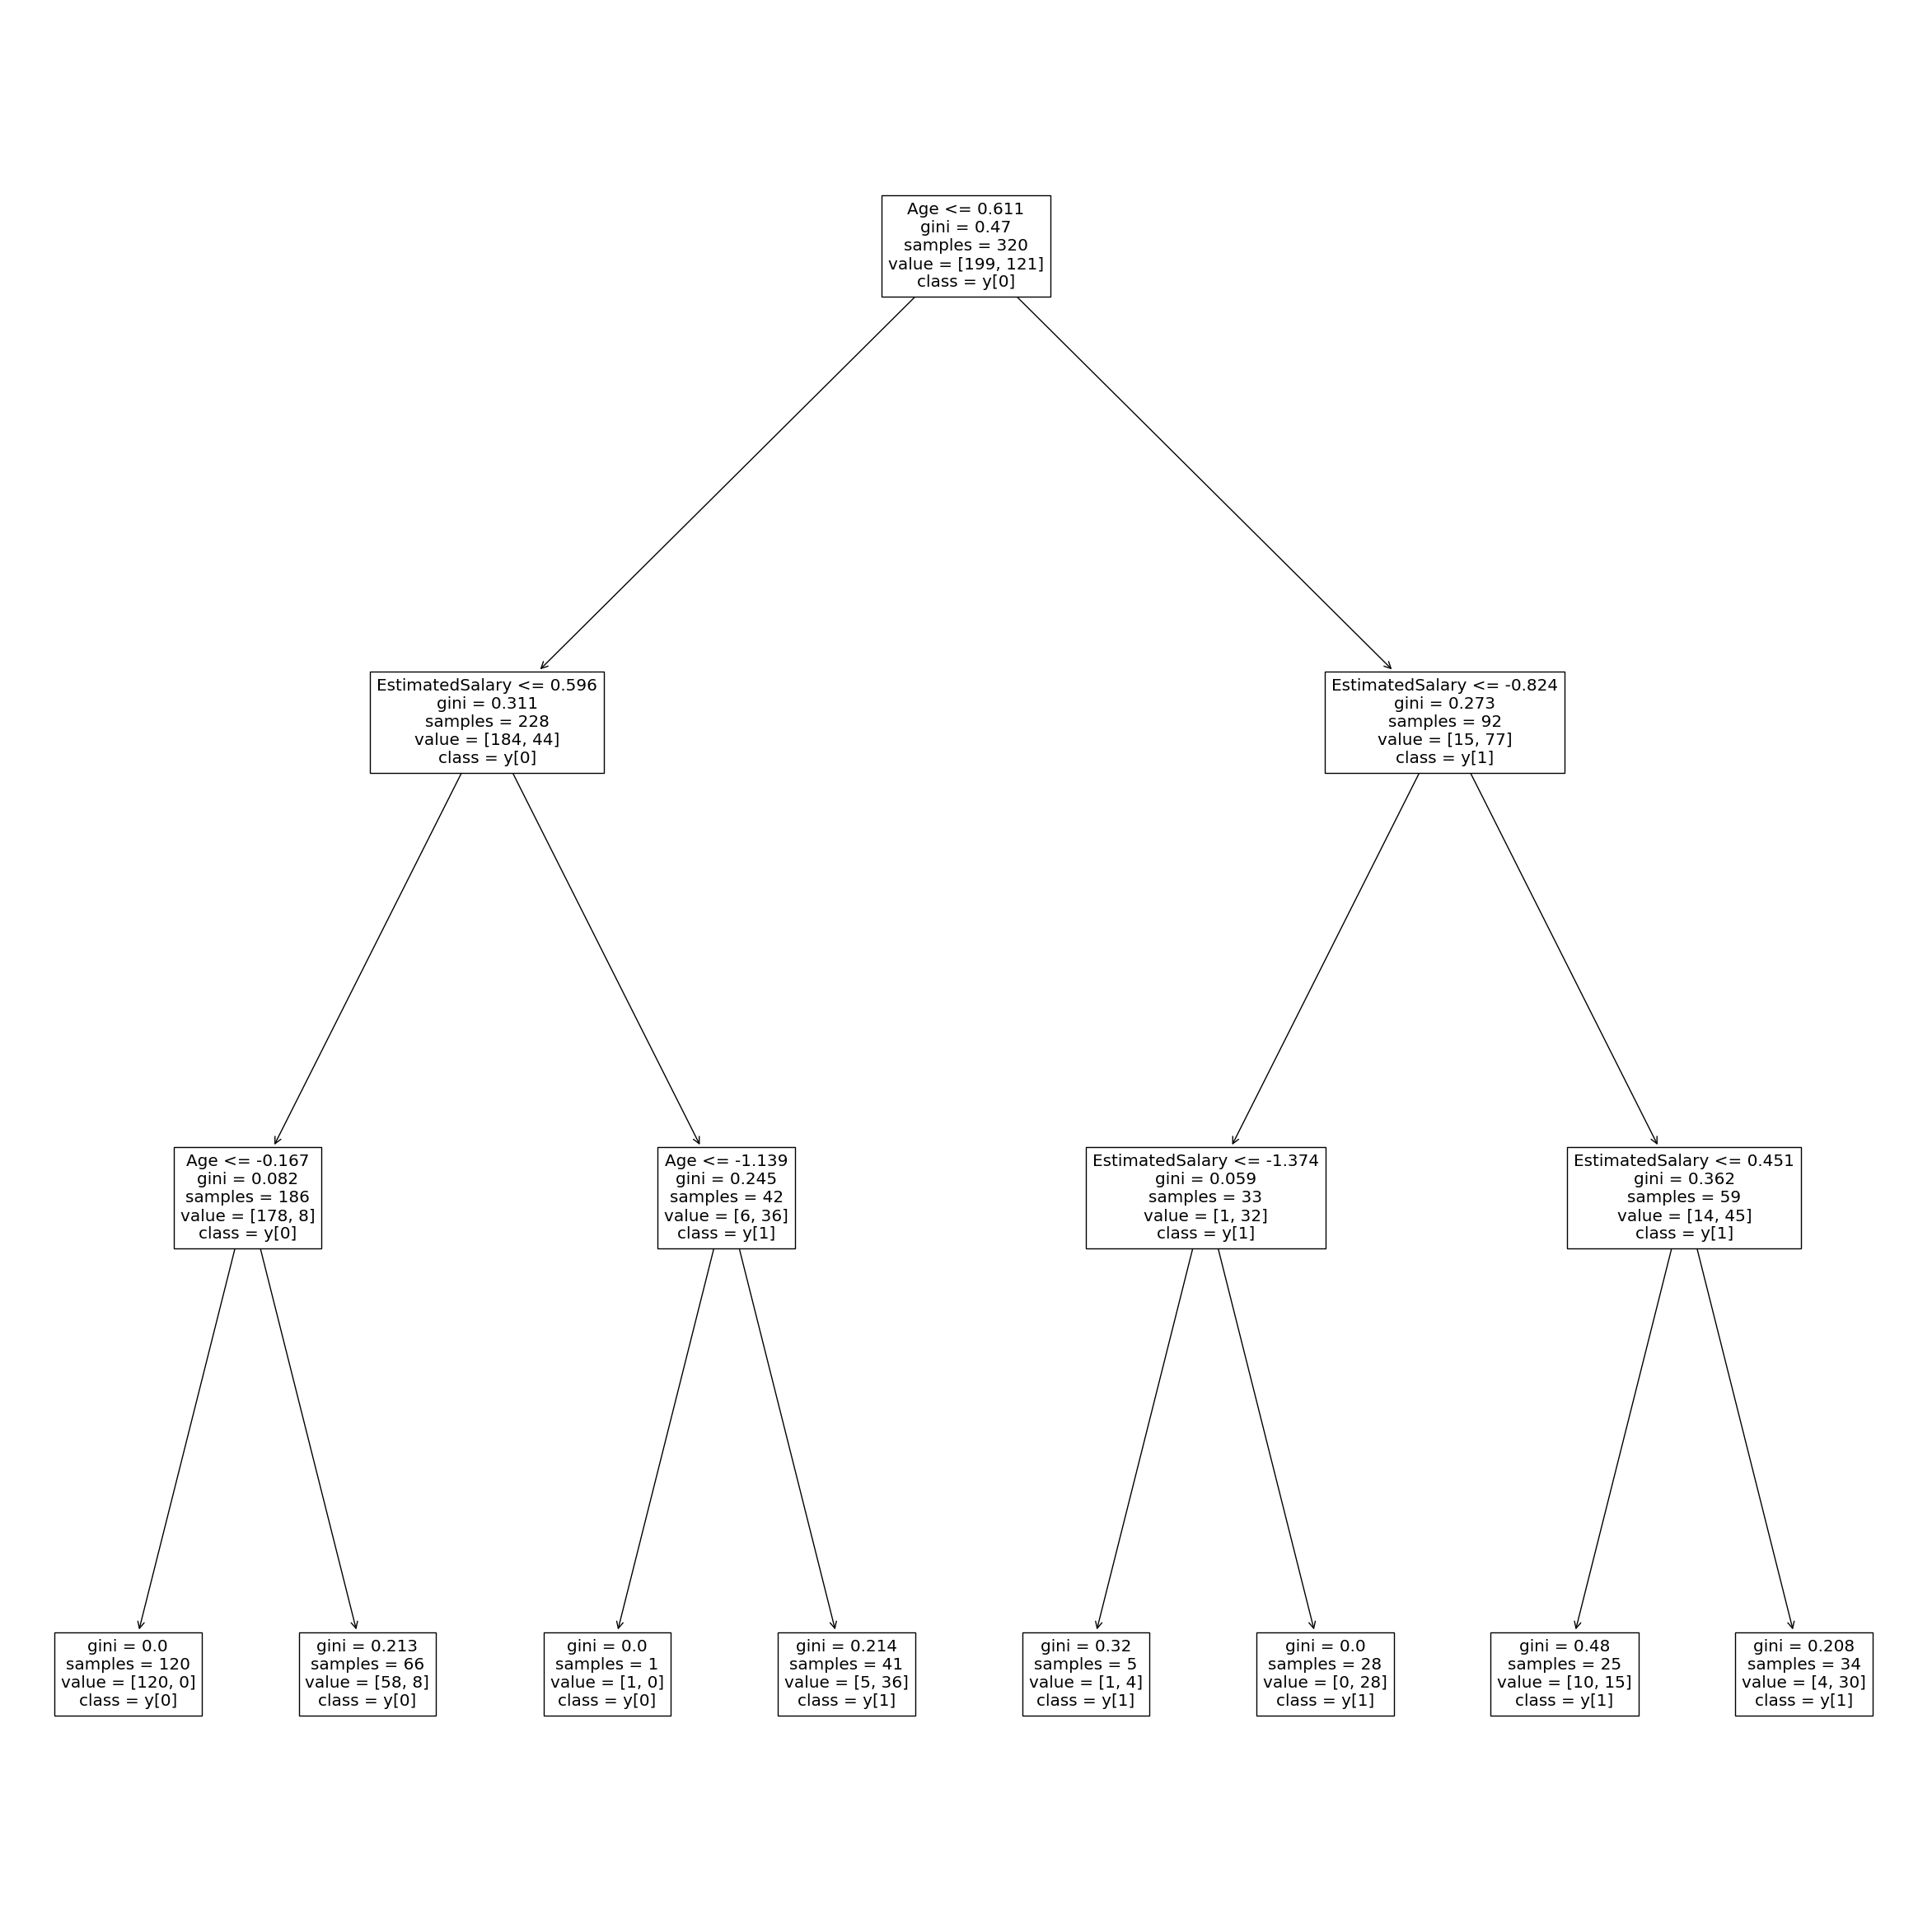

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree2 = DecisionTreeClassifier(random_state=0, max_depth=3)
tree2.fit(X_train_transform,y_train)
y_pred_test = tree2.predict(X_test_transform)
y_pred_train = tree2.predict(X_train_transform)

print(f"f1-score on training data is : {f1_score(y_train,y_pred_train)}")
print(f"f1-score on test data is : {f1_score(y_test,y_pred_test)}")
plt.figure(figsize=(30,30))
plot_tree(tree2,feature_names=X.columns,class_names=True)
plt.show()

This adjustment demonstrates an improved balance, with the model achieving strong predictive performance on the test data without overfitting to the training data.

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
tree = DecisionTreeClassifier(random_state=42)
param_grid = {"criterion":["gini", "entropy", "log_loss"],
             "max_depth":[2,4,5],
             "min_samples_split":[2, 3, 4]}
# Total model combinations = 3*1*3 = 9
# kfold = 5
# Total iterations = 9*5 = 45
grid = GridSearchCV(tree, cv=5,param_grid=param_grid,scoring='accuracy',verbose=1)
grid.fit(X_train_transform,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 5],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy', verbose=1)

In [18]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [20]:
grid.best_score_

0.9